In [34]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from browser import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
TUNABLE = ['m_groups', 'k_winners', 'eps', 'fpartition', 'forget_mu', 'boost_strength', 'boost_strength_factor']

In [36]:
exps = [
    'Flat_PTB_Explore',
    'Flat_PTB_Snipe',
    'Flat_PTB_Snipe2',
]

paths = [os.path.expanduser("~/s3_jgordon/ray/results/{}".format(e)) for e in exps]
df = load_many(paths)

Loaded 84 experiments


In [37]:
df.loc[~df.k_winners_pct.isnull(), 'k_winners'] = df.k_winners_pct * df.m_groups
df.k_winners = df.k_winners.astype(int)

for tp in TUNABLE:
    if tp not in df:
        df[tp] = None
        
df.fillna(value={
    'forget_mu': 0.0,
    'dropout_p': 0.0,
    'balance_part_winners': False
}, inplace=True)


In [38]:
def scatter_all_tunable(df, params=TUNABLE, ppl_cutoff=220):
    fig, axs = plt.subplots(len(params), 1, figsize=(8, 14), 
                            dpi=144, 
                            gridspec_kw={'hspace': 0.7})
    for ax, p in zip(axs, params):
        df[df.val_pred_ppl_min <= ppl_cutoff].plot(kind='scatter', x=p, y='val_pred_ppl_min', c='train_pred_ppl_min', colormap='viridis', ax=ax)
        ax.set_title("%s vs min val PPL" % p)
    plt.show()

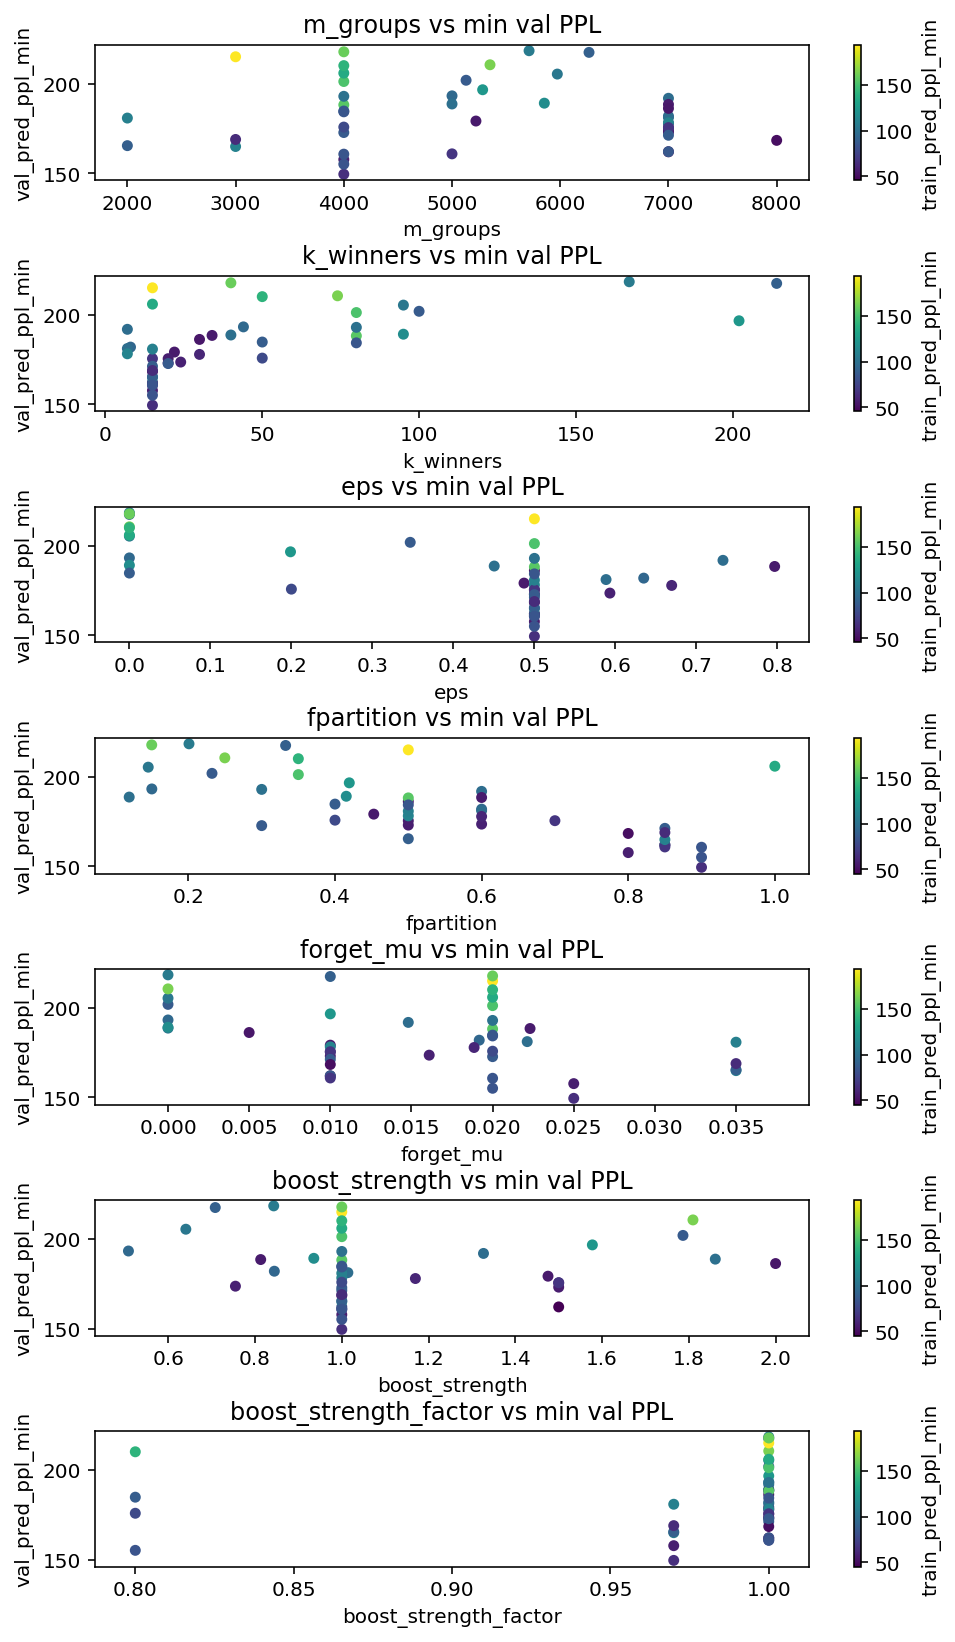

In [39]:
scatter_all_tunable(df)

In [44]:
df.sort_values('val_pred_ppl_min')[TUNABLE + ['weight_sparsity', 'x_b_norm', 'balance_part_winners'] + 
                                   ['val_pred_ppl_min', 'val_pred_acc_max', 'train_pred_ppl_min', 'epoch_val_pred_ppl']]

,m_groups,k_winners,eps,fpartition,forget_mu,boost_strength,boost_strength_factor,weight_sparsity,x_b_norm,balance_part_winners,val_pred_ppl_min,val_pred_acc_max,train_pred_ppl_min,epoch_val_pred_ppl
75,4000,15,0.500000,0.900000,0.025000,1.000000,0.97,None,True,False,149.533360,23.207171,65.229777,50
79,4000,15,0.500000,0.900000,0.020000,1.000000,0.80,None,True,True,155.133020,22.570667,84.297827,47
48,4000,15,0.500000,0.800000,0.025000,1.000000,0.97,None,True,False,157.728945,22.343958,57.851861,45
56,4000,15,0.500000,0.900000,0.020000,1.000000,1.00,None,True,True,160.709427,22.469333,84.384822,45
47,5000,15,0.500000,0.850000,0.010000,1.000000,1.00,0.3,True,False,160.872428,22.691899,68.133196,55
42,7000,15,0.500000,0.850000,0.010000,1.500000,1.00,NaN,False,False,162.030516,22.363878,45.408591,11
46,7000,15,0.500000,0.850000,0.010000,1.000000,1.00,0.3,True,False,162.083793,22.406375,86.599488,54
49,3000,15,0.500000,0.850000,0.035000,1.000000,0.97,None,True,False,164.965017,22.027888,110.877298,30
50,2000,15,0.500000,0.500000,0.035000,1.000000,0.97,None,True,False,165.441337,22.013280,89.712456,36
44,8000,15,0.500000,0.800000,0.010000,1.000000,1.00,NaN,True,False,168.384175,21.865870,50.688927,34


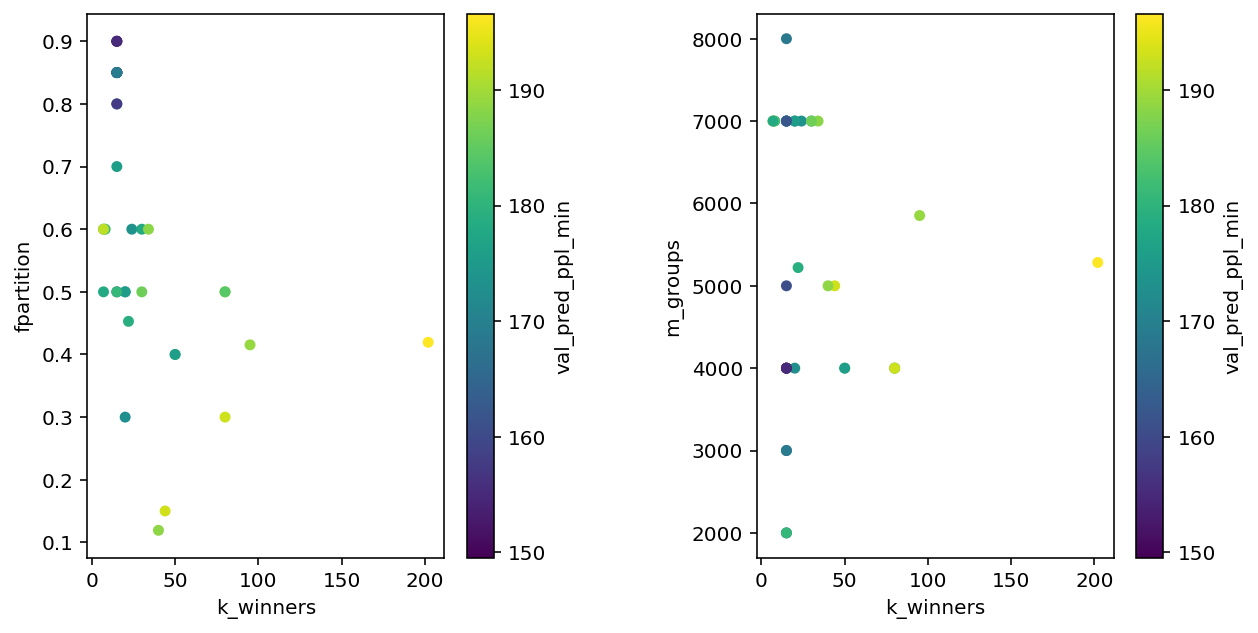

In [41]:
fig, axs = plt.subplots(1, 2, dpi=144, figsize=(10, 5), gridspec_kw={'wspace': 0.5})
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='fpartition', c='val_pred_ppl_min', colormap='viridis', ax=axs[0])
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='m_groups', c='val_pred_ppl_min', colormap='viridis', ax=axs[1])
plt.show()

Text(0.5, 1.0, 'Normalization slows down time-to-peak')

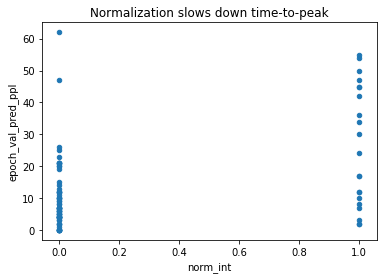

In [42]:
df['norm_int'] = 0
df.loc[df.x_b_norm, 'norm_int'] = 1
df.plot(kind='scatter', x='norm_int', y='epoch_val_pred_ppl')
plt.title("Normalization slows down time-to-peak")